In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imagenetmini-1000:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F547506%2F998277%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240928%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240928T101620Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D420eac84502137a1f76e829f6cd749acfc03902aaeac19c5f3685781b38770824587c525e50f4458aae55246711afd4e74a9bcd310b20e8f4707a6af12fb7ebd6f6ff322ed35a4698fd312150af750695fddfe1237122935ddf29d8fe7139d0a1438d5648692059f8e385b9162c12de64fbf1e6cd635c8442209b1307ebf9238d6b7a7ee42382d97d7d071d372d77f6a946a585ae5da7278fbbe9cca238991b8dd0c5b87a9f75228f72035fc1b1a2f2aa880d89844211d0d6e84033563f23aedffb3def0d277eed8c3d100e35c2215f015df12ebec5c9f36f1c7a65296b1192020ceca4779cf2003f3d3df99cb0631d5e5a94dc4c11199fa00c7ae30f1e7d4e4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join("/content/dataset")
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4211443423 bytes downloaded
Downloaded and uncompressed: imagenetmini-1000
Data source import complete.


In [ ]:
!pip install numpy pillow matplotlib tensorflow scikit-learn annoy tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552448 sha256=192c30d13c1e86332afbb2c37f633422c48cac23f6c2ac9b226e17002223466a
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
import os
import shutil
import pandas as pd

In [ ]:
# Base directory of your dataset
base_dir = '/content/dataset/imagenet-mini'  # Adjust this path

# Paths to train and val directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Path for the new images directory
images_dir = os.path.join(base_dir, 'images')

# Ensure the images directory exists
os.makedirs(images_dir, exist_ok=True)


In [ ]:
train_data = []
val_data = []

In [ ]:
# Iterate over each category in the train directory
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        # Iterate over each image in the category
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"  # To avoid filename conflicts
            img_dst_path = os.path.join(images_dir, img_dst_name)
            # Move the image to the images directory
            shutil.move(img_src_path, img_dst_path)
            # Record the filename and label
            train_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
# Iterate over each category in the val directory
for category in os.listdir(val_dir):
    category_path = os.path.join(val_dir, category)
    if os.path.isdir(category_path):
        # Iterate over each image in the category
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"  # To avoid filename conflicts
            img_dst_path = os.path.join(images_dir, img_dst_name)
            # Move the image to the images directory
            shutil.move(img_src_path, img_dst_path)
            # Record the filename and label
            val_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
# Convert lists to DataFrames
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)

# Save to CSV files
train_csv_path = os.path.join(base_dir, 'train.csv')
val_csv_path = os.path.join(base_dir, 'val.csv')

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)

In [ ]:
test_csv_path = os.path.join(base_dir, 'test.csv')  # This will be created

In [ ]:
combined_df = pd.concat([train_df, val_df], ignore_index=True)

In [ ]:
# Define the proportion for the test set (e.g., 10%)
test_size = 0.1  # 10% of the data

# Shuffle the combined data
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the number of test samples
num_test_samples = int(test_size * len(combined_df))

# Split the data
test_df = combined_df.iloc[:num_test_samples]
remaining_df = combined_df.iloc[num_test_samples:]

In [ ]:
# Calculate the proportion of validation data in the remaining data
val_proportion = len(val_df) / (len(train_df) + len(val_df))

# Calculate the number of validation samples
num_val_samples = int(val_proportion * len(remaining_df))

# Split remaining data into new validation and training sets
val_df_new = remaining_df.iloc[:num_val_samples]
train_df_new = remaining_df.iloc[num_val_samples:]

In [ ]:
# Save the new train.csv
train_df_new.to_csv(train_csv_path, index=False)

# Save the new val.csv
val_df_new.to_csv(val_csv_path, index=False)

# Save the new test.csv
test_df.to_csv(test_csv_path, index=False)

In [ ]:
import os
import pandas as pd

# Define the base directory
base_dir = '/content/dataset/imagenet-mini'

# Path to the images directory
image_dir = os.path.join(base_dir, 'images')

# Load the CSV files
train_csv = pd.read_csv(os.path.join(base_dir, 'train.csv'))
val_csv = pd.read_csv(os.path.join(base_dir, 'val.csv'))
test_csv = pd.read_csv(os.path.join(base_dir, 'test.csv'))

# Combine all data into a single DataFrame
all_data = pd.concat([train_csv, val_csv, test_csv], ignore_index=True)

# Get the list of image file paths
image_files = [os.path.join(image_dir, fname) for fname in all_data['filename']]

In [ ]:
import numpy as np
from PIL import Image
from tqdm import tqdm

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size, Image.LANCZOS) # Use Image.LANCZOS instead of Image.ANTIALIAS
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

In [ ]:
def image_batch_generator(image_files, batch_size, preprocess_function):
    num_images = len(image_files)
    for offset in range(0, num_images, batch_size):
        batch_files = image_files[offset:offset+batch_size]
        batch_images = [preprocess_function(img_path) for img_path in batch_files]
        yield np.array(batch_images)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

<ipython-input-23-6cdc49434d4a>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


In [ ]:
batch_size = 32  # Adjust based on your laptop's capabilities
feature_vectors = []
num_images = len(image_files)

# Use tqdm for progress tracking
for batch_images in tqdm(image_batch_generator(image_files, batch_size, preprocess_image), total=num_images // batch_size):
    features = base_model.predict(batch_images)
    feature_vectors.extend(features)

# Convert the list to a NumPy array
feature_vectors = np.array(feature_vectors)

  0%|          | 0/1208 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  0%|          | 1/1208 [00:04<1:24:33,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 2/1208 [00:06<1:03:35,  3.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 3/1208 [00:08<50:02,  2.49s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 4/1208 [00:10<44:27,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 5/1208 [00:11<40:00,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 6/1208 [00:13<37:12,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 7/1208 [00:14<35:27,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 8/1208 [00:16<36:25,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  1%|          | 9/1208 [00:20<46:51,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 10/1208 [00:22<44:43,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 11/1208 [00:24<42:29,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 12/1208 [00:25<38:33,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 13/1208 [00:27<36:10,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 14/1208 [00:28<34:19,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 15/1208 [00:30<35:52,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|▏         | 16/1208 [00:33<40:36,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|▏         | 17/1208 [00:34<37:23,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|▏         | 18/1208 [00:36<35:23,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 19/1208 [00:38<34:35,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 20/1208 [00:39<34:04,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 21/1208 [00:41<32:56,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 22/1208 [00:42<32:19,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 23/1208 [00:44<35:18,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  2%|▏         | 24/1208 [00:50<58:21,  2.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 25/1208 [00:52<49:49,  2.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 26/1208 [00:53<44:14,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 27/1208 [00:55<40:02,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 28/1208 [00:56<37:01,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 29/1208 [00:59<40:06,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 30/1208 [01:01<44:04,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 31/1208 [01:03<40:05,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 32/1208 [01:05<36:59,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 33/1208 [01:06<34:46,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 34/1208 [01:09<38:59,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 35/1208 [01:10<36:10,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 36/1208 [01:12<39:04,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 37/1208 [01:15<39:16,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 38/1208 [01:16<36:21,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 39/1208 [01:18<34:22,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 40/1208 [01:19<32:56,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 41/1208 [01:21<33:48,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 42/1208 [01:22<32:30,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▎         | 43/1208 [01:24<32:12,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▎         | 44/1208 [01:27<36:47,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▎         | 45/1208 [01:28<35:10,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 46/1208 [01:30<34:11,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 47/1208 [01:31<32:56,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 48/1208 [01:34<36:09,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 49/1208 [01:36<36:45,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 50/1208 [01:37<34:45,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 51/1208 [01:40<39:19,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 52/1208 [01:42<38:57,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 53/1208 [01:43<36:17,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 54/1208 [01:45<34:48,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 55/1208 [01:46<33:18,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 56/1208 [01:48<31:55,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 57/1208 [01:49<30:59,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▍         | 58/1208 [01:52<34:01,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▍         | 59/1208 [01:54<37:12,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 60/1208 [01:55<34:44,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 61/1208 [01:57<33:05,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 62/1208 [01:59<32:10,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 63/1208 [02:00<31:26,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 64/1208 [02:02<31:15,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 65/1208 [02:03<31:07,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 66/1208 [02:06<36:43,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 67/1208 [02:09<40:05,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 68/1208 [02:11<41:37,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 69/1208 [02:13<38:19,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 70/1208 [02:14<35:21,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 71/1208 [02:16<33:30,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 72/1208 [02:17<32:56,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 73/1208 [02:20<37:27,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 74/1208 [02:22<36:06,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 75/1208 [02:23<33:50,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▋         | 76/1208 [02:25<32:16,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▋         | 77/1208 [02:26<31:08,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▋         | 78/1208 [02:28<30:18,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 79/1208 [02:29<29:42,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 80/1208 [02:31<32:56,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 81/1208 [02:34<41:09,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 82/1208 [02:36<37:32,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 83/1208 [02:38<34:42,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 84/1208 [02:39<33:01,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 85/1208 [02:42<39:41,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 86/1208 [02:44<36:42,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 87/1208 [02:46<38:21,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 88/1208 [02:48<39:35,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 89/1208 [02:50<35:58,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 90/1208 [02:51<33:44,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 91/1208 [02:53<33:50,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 92/1208 [02:55<35:02,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 93/1208 [02:57<33:22,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 94/1208 [02:58<33:24,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 95/1208 [03:01<38:26,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 96/1208 [03:03<37:49,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 97/1208 [03:06<42:07,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 98/1208 [03:09<47:12,  2.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 99/1208 [03:12<50:37,  2.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  8%|▊         | 100/1208 [03:17<59:15,  3.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 101/1208 [03:19<54:31,  2.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 102/1208 [03:21<46:26,  2.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▊         | 103/1208 [03:22<40:53,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▊         | 104/1208 [03:24<36:56,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▊         | 105/1208 [03:25<34:12,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  9%|▉         | 106/1208 [03:28<40:07,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▉         | 107/1208 [03:31<46:39,  2.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 108/1208 [03:33<41:17,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 109/1208 [03:34<37:00,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 110/1208 [03:36<34:14,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 111/1208 [03:37<31:56,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 112/1208 [03:39<30:22,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 113/1208 [03:41<30:29,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▉         | 114/1208 [03:43<34:55,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 115/1208 [03:45<33:50,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 116/1208 [03:46<31:59,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 117/1208 [03:48<30:48,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 118/1208 [03:49<29:44,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 119/1208 [03:51<28:45,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 120/1208 [03:52<28:26,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 121/1208 [03:54<28:55,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|█         | 122/1208 [03:57<37:02,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 123/1208 [03:59<34:47,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 124/1208 [04:00<32:23,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 125/1208 [04:02<30:38,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 126/1208 [04:03<29:35,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 127/1208 [04:05<28:35,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 128/1208 [04:06<28:03,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 129/1208 [04:08<30:32,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 130/1208 [04:11<34:06,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 131/1208 [04:12<31:50,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 132/1208 [04:14<30:16,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 133/1208 [04:15<29:20,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 134/1208 [04:17<28:47,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 135/1208 [04:18<28:05,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█▏        | 136/1208 [04:20<29:08,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█▏        | 137/1208 [04:22<32:46,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█▏        | 138/1208 [04:24<34:59,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 139/1208 [04:26<32:25,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 140/1208 [04:27<30:21,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 141/1208 [04:29<29:05,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 142/1208 [04:30<28:13,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 143/1208 [04:32<27:34,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 144/1208 [04:33<27:04,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 145/1208 [04:35<29:16,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 146/1208 [04:38<33:14,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 147/1208 [04:39<31:24,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 148/1208 [04:41<29:40,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 149/1208 [04:42<28:50,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 150/1208 [04:44<28:38,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▎        | 151/1208 [04:45<27:32,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 152/1208 [04:47<26:54,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 153/1208 [04:48<27:30,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 154/1208 [04:51<31:55,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 155/1208 [04:52<30:58,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 156/1208 [04:54<32:12,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 157/1208 [04:57<39:09,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 158/1208 [04:59<35:07,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 159/1208 [05:02<40:07,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 160/1208 [05:04<40:53,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 161/1208 [05:06<37:21,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 162/1208 [05:08<33:57,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 163/1208 [05:09<31:33,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 164/1208 [05:10<29:42,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 165/1208 [05:12<29:02,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 166/1208 [05:14<28:09,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 167/1208 [05:15<29:10,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 14%|█▍        | 168/1208 [05:18<33:32,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 169/1208 [05:20<31:39,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 170/1208 [05:21<30:00,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 171/1208 [05:23<28:43,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 172/1208 [05:24<27:46,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 173/1208 [05:25<27:07,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 174/1208 [05:27<26:34,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 175/1208 [05:29<27:27,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▍        | 176/1208 [05:31<31:24,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 177/1208 [05:33<30:31,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 178/1208 [05:34<29:58,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 179/1208 [05:36<30:37,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 180/1208 [05:38<29:08,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 181/1208 [05:39<28:02,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 182/1208 [05:41<27:08,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▌        | 183/1208 [05:43<28:48,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▌        | 184/1208 [05:45<32:29,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 185/1208 [05:47<31:17,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 186/1208 [05:48<29:21,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 187/1208 [05:50<28:14,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 188/1208 [05:51<27:35,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 189/1208 [05:53<26:54,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 190/1208 [05:54<26:10,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 191/1208 [05:56<27:25,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▌        | 192/1208 [05:58<31:40,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 193/1208 [06:00<30:19,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 194/1208 [06:02<28:56,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 195/1208 [06:03<28:06,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 196/1208 [06:05<27:06,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▋        | 197/1208 [06:06<27:07,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▋        | 198/1208 [06:08<27:20,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▋        | 199/1208 [06:10<28:54,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 200/1208 [06:12<32:49,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 201/1208 [06:14<30:24,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 202/1208 [06:15<28:46,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 203/1208 [06:17<27:36,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 204/1208 [06:18<26:45,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 205/1208 [06:20<26:14,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 206/1208 [06:21<25:49,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 207/1208 [06:23<26:53,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 208/1208 [06:26<31:29,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 209/1208 [06:27<30:00,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 210/1208 [06:29<28:26,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 211/1208 [06:30<28:44,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 212/1208 [06:32<30:03,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 213/1208 [06:35<35:38,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


 18%|█▊        | 214/1208 [06:40<49:07,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 215/1208 [06:43<48:57,  2.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 216/1208 [06:46<49:44,  3.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 217/1208 [06:48<42:11,  2.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 218/1208 [06:49<36:54,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 18%|█▊        | 219/1208 [06:52<40:59,  2.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 220/1208 [06:56<47:58,  2.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 221/1208 [06:59<45:36,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 222/1208 [07:00<39:14,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 223/1208 [07:02<34:56,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▊        | 224/1208 [07:03<31:29,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▊        | 225/1208 [07:05<32:46,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▊        | 226/1208 [07:08<34:51,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 227/1208 [07:09<31:30,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 228/1208 [07:11<29:20,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 229/1208 [07:12<27:43,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 230/1208 [07:14<26:31,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 231/1208 [07:15<25:57,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 232/1208 [07:17<25:42,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 233/1208 [07:19<28:00,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▉        | 234/1208 [07:21<31:16,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 235/1208 [07:23<29:29,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 236/1208 [07:24<27:48,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 237/1208 [07:26<26:48,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 238/1208 [07:27<25:53,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 239/1208 [07:29<25:34,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 240/1208 [07:30<25:03,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 241/1208 [07:32<25:59,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 242/1208 [07:35<30:31,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 243/1208 [07:36<28:45,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 244/1208 [07:38<27:16,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 245/1208 [07:40<32:54,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 246/1208 [07:44<37:51,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 247/1208 [07:46<39:38,  2.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 248/1208 [07:49<39:49,  2.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 249/1208 [07:50<34:44,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 250/1208 [07:52<31:09,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 251/1208 [07:53<28:59,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 252/1208 [07:55<27:43,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 253/1208 [07:56<26:24,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 254/1208 [07:58<25:28,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 255/1208 [08:01<31:43,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 256/1208 [08:02<30:03,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██▏       | 257/1208 [08:04<28:18,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██▏       | 258/1208 [08:05<26:42,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██▏       | 259/1208 [08:07<25:46,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 260/1208 [08:08<25:01,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 261/1208 [08:10<24:33,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 262/1208 [08:11<24:12,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 263/1208 [08:14<28:16,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 264/1208 [08:16<28:48,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 265/1208 [08:17<27:02,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 266/1208 [08:18<25:44,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 267/1208 [08:20<25:01,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 268/1208 [08:21<24:18,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 269/1208 [08:23<24:06,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 270/1208 [08:24<23:59,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 22%|██▏       | 271/1208 [08:28<31:49,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 272/1208 [08:29<29:53,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 273/1208 [08:31<27:59,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 274/1208 [08:32<26:37,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 275/1208 [08:34<25:22,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 276/1208 [08:35<24:38,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 277/1208 [08:37<24:05,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 278/1208 [08:38<24:02,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 279/1208 [08:41<27:47,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 280/1208 [08:42<27:28,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 281/1208 [08:44<26:04,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 282/1208 [08:45<25:04,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 283/1208 [08:47<24:26,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▎       | 284/1208 [08:48<23:44,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▎       | 285/1208 [08:50<25:01,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


 24%|██▎       | 286/1208 [09:00<1:05:07,  4.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 24%|██▍       | 287/1208 [09:06<1:10:14,  4.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▍       | 288/1208 [09:09<1:03:52,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 24%|██▍       | 289/1208 [09:15<1:12:35,  4.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 290/1208 [09:17<57:48,  3.78s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 291/1208 [09:18<47:16,  3.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 292/1208 [09:20<40:01,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 293/1208 [09:21<35:01,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 294/1208 [09:23<31:43,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 295/1208 [09:24<29:20,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▍       | 296/1208 [09:27<32:06,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 297/1208 [09:29<30:16,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 298/1208 [09:30<28:09,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 299/1208 [09:32<26:31,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 300/1208 [09:33<25:33,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 301/1208 [09:35<24:51,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 302/1208 [09:36<24:15,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 303/1208 [09:38<25:26,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▌       | 304/1208 [09:41<29:08,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 305/1208 [09:42<27:55,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 306/1208 [09:44<26:25,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 307/1208 [09:45<25:30,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 308/1208 [09:47<24:59,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 309/1208 [09:48<24:28,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 310/1208 [09:50<23:44,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 311/1208 [09:52<25:21,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 312/1208 [09:54<29:01,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 313/1208 [09:56<27:19,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 314/1208 [09:58<26:09,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 315/1208 [09:59<24:55,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 316/1208 [10:01<24:37,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 317/1208 [10:02<23:55,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▋       | 318/1208 [10:04<23:43,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▋       | 319/1208 [10:06<26:04,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▋       | 320/1208 [10:08<29:03,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 321/1208 [10:10<27:06,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 322/1208 [10:11<25:35,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 323/1208 [10:13<24:40,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 324/1208 [10:14<23:46,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 325/1208 [10:16<23:17,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 326/1208 [10:17<22:53,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 327/1208 [10:19<24:59,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 328/1208 [10:22<28:08,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 329/1208 [10:23<26:38,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 330/1208 [10:25<25:32,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 331/1208 [10:27<28:48,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 332/1208 [10:29<27:44,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 333/1208 [10:31<26:02,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 334/1208 [10:33<26:11,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 335/1208 [10:35<29:19,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 336/1208 [10:37<28:25,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 337/1208 [10:38<26:38,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 338/1208 [10:40<25:07,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 339/1208 [10:41<24:10,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 340/1208 [10:43<23:14,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 341/1208 [10:45<25:00,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 342/1208 [10:48<30:31,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 343/1208 [10:50<29:14,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 344/1208 [10:51<27:00,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▊       | 345/1208 [10:53<25:24,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▊       | 346/1208 [10:54<24:09,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▊       | 347/1208 [10:56<24:58,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 348/1208 [10:58<23:52,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 349/1208 [11:00<24:59,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 350/1208 [11:02<29:06,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 351/1208 [11:04<26:49,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 352/1208 [11:05<25:24,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 353/1208 [11:07<24:12,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 354/1208 [11:08<23:25,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 355/1208 [11:10<23:10,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 356/1208 [11:11<22:23,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|██▉       | 357/1208 [11:13<24:08,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|██▉       | 358/1208 [11:16<27:21,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 359/1208 [11:17<25:26,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 360/1208 [11:19<24:09,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 361/1208 [11:20<23:15,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 362/1208 [11:22<22:42,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 363/1208 [11:23<22:06,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 364/1208 [11:25<22:13,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|███       | 365/1208 [11:27<23:40,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|███       | 366/1208 [11:29<26:43,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 367/1208 [11:31<25:15,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 368/1208 [11:32<24:03,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 369/1208 [11:34<23:16,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 370/1208 [11:36<22:41,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 371/1208 [11:37<21:58,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 372/1208 [11:38<21:38,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 373/1208 [11:41<24:09,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 374/1208 [11:43<27:09,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 375/1208 [11:45<25:33,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 376/1208 [11:46<23:57,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 377/1208 [11:48<23:03,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███▏      | 378/1208 [11:49<22:16,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███▏      | 379/1208 [11:51<21:56,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███▏      | 380/1208 [11:52<21:31,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 381/1208 [11:54<22:21,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 382/1208 [11:56<25:51,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 383/1208 [11:58<24:36,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 384/1208 [11:59<23:21,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 385/1208 [12:01<22:39,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 386/1208 [12:03<22:02,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 387/1208 [12:04<21:36,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 388/1208 [12:06<21:35,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 389/1208 [12:07<21:53,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 390/1208 [12:10<25:37,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 391/1208 [12:11<24:49,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 392/1208 [12:13<23:22,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 393/1208 [12:14<22:20,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 394/1208 [12:16<21:40,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 395/1208 [12:17<21:12,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 396/1208 [12:19<20:51,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 397/1208 [12:21<22:51,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 398/1208 [12:23<26:10,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 399/1208 [12:25<24:41,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 400/1208 [12:27<23:13,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 401/1208 [12:28<22:07,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 402/1208 [12:30<21:42,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 403/1208 [12:31<21:15,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 404/1208 [12:33<21:29,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▎      | 405/1208 [12:35<22:20,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 34%|███▎      | 406/1208 [12:37<25:24,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▎      | 407/1208 [12:39<24:14,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 408/1208 [12:40<22:49,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 409/1208 [12:42<22:06,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 410/1208 [12:43<21:32,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 411/1208 [12:45<20:56,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 412/1208 [12:46<20:35,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 413/1208 [12:48<21:06,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 34%|███▍      | 414/1208 [12:50<24:49,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 415/1208 [12:52<23:53,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 416/1208 [12:53<22:32,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 417/1208 [12:55<21:42,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 418/1208 [12:56<21:03,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 419/1208 [12:58<20:38,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 420/1208 [12:59<20:18,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 421/1208 [13:01<20:34,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▍      | 422/1208 [13:03<23:55,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 423/1208 [13:05<23:23,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 424/1208 [13:07<22:32,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 425/1208 [13:08<21:39,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 426/1208 [13:10<21:03,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 427/1208 [13:12<21:41,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▌      | 428/1208 [13:14<25:24,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▌      | 429/1208 [13:17<27:40,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 430/1208 [13:18<26:02,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 431/1208 [13:20<24:02,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 432/1208 [13:21<22:23,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 433/1208 [13:23<21:54,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 434/1208 [13:25<21:28,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 435/1208 [13:26<20:50,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 436/1208 [13:28<21:50,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▌      | 437/1208 [13:31<25:07,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 438/1208 [13:32<23:42,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 439/1208 [13:34<22:19,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 440/1208 [13:35<21:38,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 441/1208 [13:37<20:47,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 442/1208 [13:38<20:10,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 443/1208 [13:40<20:06,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 444/1208 [13:41<20:37,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 445/1208 [13:44<24:24,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 446/1208 [13:46<23:14,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 447/1208 [13:47<21:53,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 448/1208 [13:49<21:05,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 449/1208 [13:50<20:23,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 450/1208 [13:52<19:59,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 451/1208 [13:53<19:52,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 452/1208 [13:55<21:11,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 453/1208 [13:58<26:25,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 454/1208 [14:00<23:52,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 455/1208 [14:01<22:19,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 456/1208 [14:03<21:09,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 457/1208 [14:04<20:36,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 458/1208 [14:06<20:15,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 459/1208 [14:07<19:47,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 460/1208 [14:09<22:10,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 461/1208 [14:12<24:08,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 462/1208 [14:13<22:29,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 463/1208 [14:15<21:30,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 464/1208 [14:16<20:34,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 465/1208 [14:18<20:06,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 466/1208 [14:19<19:41,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 467/1208 [14:21<19:22,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▊      | 468/1208 [14:23<21:42,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 469/1208 [14:25<23:34,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 470/1208 [14:27<22:12,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 471/1208 [14:28<21:11,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 472/1208 [14:30<20:12,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 473/1208 [14:31<19:37,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 474/1208 [14:33<19:08,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 475/1208 [14:34<18:50,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 476/1208 [14:36<20:44,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 477/1208 [14:39<23:30,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 478/1208 [14:41<22:06,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 479/1208 [14:42<20:46,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 480/1208 [14:43<19:55,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 481/1208 [14:45<19:33,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 482/1208 [14:47<19:10,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 483/1208 [14:48<19:21,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 484/1208 [14:50<20:50,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 485/1208 [14:53<23:27,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 486/1208 [14:54<23:03,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 487/1208 [14:56<21:22,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 488/1208 [14:57<20:14,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 489/1208 [14:59<19:31,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 490/1208 [15:00<19:07,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 491/1208 [15:02<18:36,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████      | 492/1208 [15:04<20:48,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████      | 493/1208 [15:06<23:08,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 494/1208 [15:08<21:35,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 495/1208 [15:10<20:38,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 496/1208 [15:11<20:11,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 497/1208 [15:13<19:37,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 498/1208 [15:14<19:08,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████▏     | 499/1208 [15:16<19:13,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████▏     | 500/1208 [15:18<21:08,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████▏     | 501/1208 [15:20<22:52,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 502/1208 [15:22<21:15,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 503/1208 [15:23<19:58,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 504/1208 [15:25<19:18,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 505/1208 [15:26<18:45,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 506/1208 [15:28<19:03,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 507/1208 [15:30<18:44,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 508/1208 [15:32<20:55,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 509/1208 [15:34<22:13,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 510/1208 [15:36<21:27,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 511/1208 [15:37<20:17,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 512/1208 [15:39<19:17,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 513/1208 [15:40<18:40,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 514/1208 [15:42<18:08,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 515/1208 [15:43<17:48,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 516/1208 [15:45<19:53,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 517/1208 [15:48<21:58,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 518/1208 [15:49<20:34,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 519/1208 [15:51<19:48,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 520/1208 [15:52<19:01,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 521/1208 [15:54<18:30,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 522/1208 [15:55<18:24,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 523/1208 [15:57<18:02,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 524/1208 [16:00<22:28,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 525/1208 [16:01<21:12,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 526/1208 [16:03<19:48,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 527/1208 [16:04<18:52,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 528/1208 [16:06<18:11,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 529/1208 [16:07<18:20,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 530/1208 [16:09<17:56,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 531/1208 [16:11<18:16,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 44%|████▍     | 532/1208 [16:13<21:24,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 44%|████▍     | 533/1208 [16:16<23:41,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 534/1208 [16:18<23:17,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 535/1208 [16:19<21:22,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 536/1208 [16:21<20:03,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 537/1208 [16:22<19:00,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 538/1208 [16:24<18:20,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▍     | 539/1208 [16:26<21:02,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 540/1208 [16:28<20:25,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 541/1208 [16:29<19:17,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 542/1208 [16:31<18:48,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 543/1208 [16:32<17:59,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 544/1208 [16:34<17:26,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 545/1208 [16:35<17:10,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 546/1208 [16:37<17:09,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▌     | 547/1208 [16:39<20:02,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 548/1208 [16:43<24:17,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 549/1208 [16:44<21:51,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 550/1208 [16:46<20:11,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 551/1208 [16:47<18:59,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 552/1208 [16:49<19:03,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 553/1208 [16:50<18:02,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 554/1208 [16:52<19:53,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 555/1208 [16:55<21:02,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 556/1208 [16:56<19:33,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 557/1208 [16:58<18:37,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 558/1208 [16:59<17:53,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 559/1208 [17:01<17:26,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 560/1208 [17:02<16:56,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 561/1208 [17:04<16:49,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 562/1208 [17:06<18:31,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 563/1208 [17:08<20:24,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 564/1208 [17:10<19:30,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 565/1208 [17:11<18:21,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 566/1208 [17:13<17:33,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 567/1208 [17:14<17:34,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 568/1208 [17:16<17:33,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 569/1208 [17:17<17:04,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 570/1208 [17:20<18:56,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 571/1208 [17:22<20:38,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 572/1208 [17:23<19:07,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 573/1208 [17:25<18:28,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 574/1208 [17:27<17:37,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 575/1208 [17:28<17:00,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 576/1208 [17:29<16:32,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 577/1208 [17:31<16:28,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 578/1208 [17:33<18:25,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 579/1208 [17:36<20:03,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 580/1208 [17:37<18:48,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 581/1208 [17:39<17:50,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 582/1208 [17:40<17:37,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 583/1208 [17:42<16:59,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 584/1208 [17:43<16:32,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 585/1208 [17:45<16:15,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▊     | 586/1208 [17:47<17:49,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▊     | 587/1208 [17:49<19:45,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▊     | 588/1208 [17:51<18:24,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 589/1208 [17:52<17:24,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 590/1208 [17:54<16:45,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 591/1208 [17:55<16:17,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 592/1208 [17:57<15:50,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 593/1208 [17:58<15:43,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 594/1208 [18:00<16:38,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 595/1208 [18:02<19:29,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 596/1208 [18:04<18:16,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 597/1208 [18:06<17:35,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 598/1208 [18:07<17:06,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 599/1208 [18:09<16:22,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 600/1208 [18:10<15:57,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 601/1208 [18:12<16:12,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|████▉     | 602/1208 [18:14<17:53,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|████▉     | 603/1208 [18:16<19:35,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 604/1208 [18:18<18:05,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 605/1208 [18:19<17:04,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 606/1208 [18:21<16:20,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 607/1208 [18:22<15:53,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 608/1208 [18:24<15:38,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 609/1208 [18:25<15:24,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 610/1208 [18:27<16:06,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 611/1208 [18:29<18:30,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 612/1208 [18:31<17:34,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 613/1208 [18:32<16:49,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 614/1208 [18:34<16:38,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 615/1208 [18:35<15:56,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 616/1208 [18:37<15:28,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 617/1208 [18:39<15:22,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 618/1208 [18:41<17:28,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 619/1208 [18:43<19:38,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 620/1208 [18:45<18:08,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 621/1208 [18:46<16:53,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 622/1208 [18:48<16:36,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 623/1208 [18:49<15:59,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 624/1208 [18:51<15:42,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 625/1208 [18:52<15:16,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 626/1208 [18:54<16:30,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 627/1208 [18:57<18:31,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 628/1208 [18:58<17:47,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 629/1208 [19:00<16:35,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 630/1208 [19:01<15:59,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


 52%|█████▏    | 631/1208 [19:09<32:35,  3.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 52%|█████▏    | 632/1208 [19:14<36:08,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 633/1208 [19:16<31:48,  3.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 634/1208 [19:17<26:37,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 635/1208 [19:19<22:58,  2.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 636/1208 [19:20<20:33,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 637/1208 [19:22<18:46,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 638/1208 [19:24<17:32,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 639/1208 [19:25<16:36,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 53%|█████▎    | 640/1208 [19:28<18:44,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 641/1208 [19:29<18:13,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 642/1208 [19:31<17:14,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 643/1208 [19:32<16:20,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 644/1208 [19:34<15:43,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 645/1208 [19:36<15:20,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 646/1208 [19:37<15:06,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▎    | 647/1208 [19:39<15:14,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▎    | 648/1208 [19:41<17:42,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▎    | 649/1208 [19:43<17:03,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 650/1208 [19:45<16:10,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 651/1208 [19:46<15:34,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 652/1208 [19:48<15:18,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 653/1208 [19:49<14:56,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 654/1208 [19:51<14:35,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 655/1208 [19:53<15:29,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 656/1208 [19:55<17:32,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 657/1208 [19:57<16:51,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 658/1208 [19:58<15:58,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 659/1208 [20:00<15:14,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 660/1208 [20:01<14:46,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 661/1208 [20:03<14:32,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 662/1208 [20:04<14:22,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 663/1208 [20:06<15:05,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▍    | 664/1208 [20:09<19:39,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 665/1208 [20:11<17:56,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 666/1208 [20:13<17:02,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 667/1208 [20:14<15:47,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 668/1208 [20:16<15:06,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 669/1208 [20:17<14:55,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 670/1208 [20:19<14:27,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▌    | 671/1208 [20:21<16:33,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 672/1208 [20:23<16:27,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 673/1208 [20:25<16:06,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 674/1208 [20:26<15:15,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 675/1208 [20:28<14:42,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 676/1208 [20:29<14:41,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 677/1208 [20:31<14:16,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 678/1208 [20:33<14:13,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▌    | 679/1208 [20:35<16:21,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 680/1208 [20:37<15:48,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 681/1208 [20:38<14:59,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 682/1208 [20:40<14:50,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 683/1208 [20:41<14:30,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 684/1208 [20:43<14:07,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 685/1208 [20:44<13:47,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 686/1208 [20:47<17:16,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 687/1208 [20:49<16:20,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 688/1208 [20:50<15:22,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 689/1208 [20:52<14:39,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 690/1208 [20:53<14:08,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 691/1208 [20:55<13:47,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 692/1208 [20:56<13:34,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 693/1208 [20:58<13:36,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 694/1208 [21:01<15:54,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 695/1208 [21:02<15:18,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 696/1208 [21:04<14:26,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 697/1208 [21:05<13:57,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 698/1208 [21:07<14:18,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 699/1208 [21:09<14:09,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 700/1208 [21:10<13:48,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 701/1208 [21:12<14:26,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 702/1208 [21:15<18:01,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 703/1208 [21:17<16:53,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 704/1208 [21:18<15:31,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 705/1208 [21:20<14:30,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 706/1208 [21:21<14:14,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▊    | 707/1208 [21:23<13:42,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▊    | 708/1208 [21:25<13:25,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▊    | 709/1208 [21:27<15:21,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 710/1208 [21:29<15:36,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 711/1208 [21:30<14:35,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 712/1208 [21:32<13:53,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 713/1208 [21:33<13:27,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 714/1208 [21:35<13:09,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 715/1208 [21:36<12:54,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 716/1208 [21:38<12:34,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▉    | 717/1208 [21:40<14:59,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 718/1208 [21:42<14:54,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 719/1208 [21:45<17:37,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 720/1208 [21:47<17:10,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 721/1208 [21:50<18:14,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 722/1208 [21:51<16:48,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 723/1208 [21:54<17:32,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 724/1208 [21:55<16:26,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 725/1208 [21:57<15:04,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 726/1208 [21:59<14:23,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 727/1208 [22:00<14:21,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 728/1208 [22:02<13:43,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 729/1208 [22:03<13:12,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 730/1208 [22:05<13:39,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 731/1208 [22:08<15:22,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 732/1208 [22:09<14:37,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 733/1208 [22:11<13:46,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 734/1208 [22:12<13:06,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 735/1208 [22:14<12:43,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 736/1208 [22:15<12:22,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 737/1208 [22:17<12:06,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 738/1208 [22:18<12:19,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 739/1208 [22:21<14:15,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 740/1208 [22:23<13:54,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 741/1208 [22:24<13:09,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 742/1208 [22:26<12:46,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 743/1208 [22:27<12:22,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 744/1208 [22:28<12:05,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 745/1208 [22:30<11:51,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 746/1208 [22:31<11:48,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 747/1208 [22:34<13:47,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 748/1208 [22:36<13:38,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 749/1208 [22:37<12:52,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 750/1208 [22:39<12:38,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 751/1208 [22:40<12:14,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 752/1208 [22:42<12:03,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 753/1208 [22:43<11:49,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 754/1208 [22:45<11:45,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▎   | 755/1208 [22:47<13:55,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 756/1208 [22:49<13:27,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 757/1208 [22:50<12:48,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 758/1208 [22:52<12:36,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 759/1208 [22:54<12:06,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 760/1208 [22:55<11:52,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 761/1208 [22:57<11:37,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 762/1208 [22:58<11:35,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 763/1208 [23:01<13:37,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 764/1208 [23:02<13:18,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 765/1208 [23:04<12:35,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 766/1208 [23:05<12:07,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 767/1208 [23:07<11:47,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 768/1208 [23:08<11:31,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 769/1208 [23:10<11:16,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 770/1208 [23:11<11:29,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 771/1208 [23:14<13:28,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 772/1208 [23:16<12:59,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 773/1208 [23:17<12:18,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 774/1208 [23:19<12:08,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 775/1208 [23:20<11:42,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 776/1208 [23:22<11:31,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 777/1208 [23:23<11:12,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 778/1208 [23:25<11:31,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 779/1208 [23:27<13:23,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 780/1208 [23:29<12:50,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 781/1208 [23:31<12:10,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 782/1208 [23:32<12:01,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 783/1208 [23:34<11:42,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 784/1208 [23:35<11:20,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 785/1208 [23:37<11:12,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 786/1208 [23:39<11:32,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▌   | 787/1208 [23:41<13:16,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 788/1208 [23:43<12:38,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 789/1208 [23:44<11:55,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 790/1208 [23:46<11:29,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 791/1208 [23:47<11:06,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 792/1208 [23:49<10:55,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 793/1208 [23:50<10:56,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 794/1208 [23:52<11:09,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▌   | 795/1208 [23:55<14:18,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 796/1208 [23:57<12:59,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 797/1208 [23:58<12:04,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 798/1208 [24:00<11:53,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 799/1208 [24:01<11:25,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 800/1208 [24:03<10:56,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▋   | 801/1208 [24:04<10:47,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▋   | 802/1208 [24:06<11:55,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▋   | 803/1208 [24:09<13:10,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 804/1208 [24:10<12:09,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 805/1208 [24:12<11:43,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 806/1208 [24:13<11:20,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 807/1208 [24:15<10:58,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 808/1208 [24:16<10:45,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 809/1208 [24:18<10:32,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 810/1208 [24:20<11:42,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 811/1208 [24:22<12:41,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 812/1208 [24:24<11:52,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 813/1208 [24:25<11:13,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 814/1208 [24:27<10:50,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 815/1208 [24:28<10:27,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 816/1208 [24:30<10:33,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 817/1208 [24:33<12:34,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 818/1208 [24:36<15:30,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 819/1208 [24:38<13:43,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 820/1208 [24:39<12:28,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 821/1208 [24:41<11:53,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 822/1208 [24:42<11:13,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 823/1208 [24:44<10:45,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 824/1208 [24:45<10:20,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 825/1208 [24:47<11:13,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 826/1208 [24:50<12:21,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 827/1208 [24:51<11:29,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 828/1208 [24:53<10:54,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 829/1208 [24:54<10:30,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 830/1208 [24:56<10:05,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 831/1208 [24:57<09:47,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 832/1208 [24:59<09:38,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 833/1208 [25:01<10:19,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 834/1208 [25:03<11:41,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 835/1208 [25:05<11:03,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 836/1208 [25:06<10:28,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 837/1208 [25:08<10:10,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 838/1208 [25:09<09:56,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 839/1208 [25:11<09:43,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 840/1208 [25:12<09:39,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 841/1208 [25:14<10:06,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|██████▉   | 842/1208 [25:17<11:38,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 843/1208 [25:18<11:01,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 844/1208 [25:20<10:26,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 845/1208 [25:21<10:02,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 846/1208 [25:23<09:50,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 847/1208 [25:24<09:33,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 848/1208 [25:26<09:23,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 849/1208 [25:27<09:35,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|███████   | 850/1208 [25:30<11:07,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 851/1208 [25:32<10:42,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 852/1208 [25:33<10:10,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 853/1208 [25:35<09:46,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 854/1208 [25:36<09:27,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 855/1208 [25:38<09:12,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 856/1208 [25:39<09:03,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 857/1208 [25:41<09:14,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 71%|███████   | 858/1208 [25:43<10:38,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 859/1208 [25:45<10:44,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 860/1208 [25:47<10:11,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 861/1208 [25:48<09:40,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 862/1208 [25:50<09:18,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 863/1208 [25:51<09:04,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 864/1208 [25:53<09:01,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 865/1208 [25:54<09:11,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 866/1208 [25:57<10:40,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 867/1208 [25:58<10:08,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 868/1208 [26:00<09:38,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 869/1208 [26:02<09:31,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 870/1208 [26:03<09:25,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 871/1208 [26:05<09:05,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 872/1208 [26:06<08:50,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 873/1208 [26:08<09:09,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 874/1208 [26:10<10:26,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 875/1208 [26:12<10:02,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 876/1208 [26:14<09:42,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 877/1208 [26:15<09:16,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 878/1208 [26:17<09:15,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 879/1208 [26:18<08:54,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 880/1208 [26:20<08:46,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 73%|███████▎  | 881/1208 [26:22<09:21,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 73%|███████▎  | 882/1208 [26:25<11:40,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 883/1208 [26:26<10:33,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 884/1208 [26:28<09:47,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 885/1208 [26:29<09:14,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 886/1208 [26:31<08:54,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 887/1208 [26:32<08:33,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▎  | 888/1208 [26:34<08:18,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▎  | 889/1208 [26:36<09:17,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▎  | 890/1208 [26:38<10:09,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 891/1208 [26:40<09:26,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 892/1208 [26:41<08:56,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 893/1208 [26:43<08:41,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 894/1208 [26:44<08:26,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 895/1208 [26:46<08:12,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 896/1208 [26:48<08:38,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▍  | 897/1208 [26:50<09:42,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▍  | 898/1208 [26:52<09:57,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 899/1208 [26:54<09:20,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 900/1208 [26:55<08:48,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 901/1208 [26:57<08:27,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 902/1208 [26:58<08:24,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 903/1208 [27:00<08:09,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 904/1208 [27:01<08:02,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▍  | 905/1208 [27:05<10:22,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 906/1208 [27:06<09:31,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 907/1208 [27:08<08:55,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 908/1208 [27:09<08:30,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 909/1208 [27:11<08:10,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 910/1208 [27:12<08:06,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▌  | 911/1208 [27:15<09:10,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▌  | 912/1208 [27:17<10:30,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▌  | 913/1208 [27:20<10:41,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 914/1208 [27:21<09:46,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 915/1208 [27:23<09:12,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 916/1208 [27:24<08:39,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 917/1208 [27:26<08:10,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 918/1208 [27:28<08:04,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 919/1208 [27:29<07:53,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▌  | 920/1208 [27:32<09:20,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 921/1208 [27:33<08:56,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 922/1208 [27:35<08:34,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 923/1208 [27:37<08:11,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 924/1208 [27:38<07:49,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 925/1208 [27:40<07:50,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 926/1208 [27:41<07:43,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 927/1208 [27:44<08:19,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 928/1208 [27:46<09:20,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 929/1208 [27:48<08:38,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 930/1208 [27:49<08:22,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 931/1208 [27:51<07:58,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 932/1208 [27:52<07:36,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 933/1208 [27:54<07:26,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 934/1208 [27:55<07:20,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 935/1208 [27:57<07:59,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 936/1208 [28:00<08:51,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 937/1208 [28:01<08:17,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 938/1208 [28:03<08:00,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 939/1208 [28:05<07:48,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 940/1208 [28:06<07:38,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 941/1208 [28:08<07:20,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 942/1208 [28:09<07:13,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 943/1208 [28:12<07:57,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 944/1208 [28:14<08:38,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 945/1208 [28:16<08:00,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 946/1208 [28:17<07:31,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 947/1208 [28:19<07:30,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 948/1208 [28:20<07:10,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▊  | 949/1208 [28:23<08:02,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▊  | 950/1208 [28:24<07:57,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▊  | 951/1208 [28:28<09:33,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 952/1208 [28:29<08:37,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 953/1208 [28:31<08:05,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 954/1208 [28:32<07:41,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 955/1208 [28:34<07:14,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 956/1208 [28:35<06:53,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 957/1208 [28:37<06:41,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 958/1208 [28:39<07:37,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 959/1208 [28:41<08:01,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 960/1208 [28:43<07:26,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 961/1208 [28:44<07:06,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 962/1208 [28:46<06:51,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 963/1208 [28:47<06:32,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 964/1208 [28:49<06:24,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 965/1208 [28:50<06:13,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|███████▉  | 966/1208 [28:53<07:02,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|████████  | 967/1208 [28:55<07:35,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 968/1208 [28:56<07:04,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 969/1208 [28:58<06:43,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 970/1208 [28:59<06:30,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 971/1208 [29:01<06:21,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 972/1208 [29:02<06:09,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 973/1208 [29:04<06:01,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 974/1208 [29:06<06:38,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 975/1208 [29:08<07:22,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 976/1208 [29:10<06:54,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 977/1208 [29:11<06:43,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


 81%|████████  | 978/1208 [29:16<10:11,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


 81%|████████  | 979/1208 [29:22<13:43,  3.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 980/1208 [29:24<12:16,  3.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 981/1208 [29:26<10:20,  2.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 982/1208 [29:27<08:59,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 983/1208 [29:29<07:58,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 984/1208 [29:31<07:18,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 985/1208 [29:32<06:50,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 986/1208 [29:34<06:36,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 987/1208 [29:36<07:23,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 988/1208 [29:38<07:01,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 989/1208 [29:40<06:36,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 990/1208 [29:41<06:19,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 991/1208 [29:43<06:04,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 992/1208 [29:44<05:57,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 993/1208 [29:46<05:50,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 994/1208 [29:48<06:03,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 995/1208 [29:50<06:55,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 996/1208 [29:52<06:31,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 997/1208 [29:53<06:13,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 998/1208 [29:55<06:09,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 999/1208 [29:58<07:00,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1000/1208 [30:00<06:46,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 1001/1208 [30:02<06:45,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 1002/1208 [30:04<07:19,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1003/1208 [30:06<06:42,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1004/1208 [30:07<06:16,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1005/1208 [30:09<06:00,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1006/1208 [30:10<05:48,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1007/1208 [30:12<05:36,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1008/1208 [30:14<05:28,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▎ | 1009/1208 [30:16<05:56,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▎ | 1010/1208 [30:18<06:32,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▎ | 1011/1208 [30:20<06:17,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1012/1208 [30:22<06:00,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1013/1208 [30:23<05:42,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1014/1208 [30:25<05:25,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1015/1208 [30:26<05:21,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1016/1208 [30:28<05:11,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 1017/1208 [30:30<05:59,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1018/1208 [30:32<05:55,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1019/1208 [30:34<05:35,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1020/1208 [30:35<05:20,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1021/1208 [30:37<05:08,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1022/1208 [30:38<05:00,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1023/1208 [30:40<04:53,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1024/1208 [30:42<04:59,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 85%|████████▍ | 1025/1208 [30:45<06:20,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1026/1208 [30:46<05:49,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1027/1208 [30:48<05:30,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1028/1208 [30:49<05:13,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1029/1208 [30:51<05:00,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1030/1208 [30:52<04:50,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1031/1208 [30:54<04:41,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 85%|████████▌ | 1032/1208 [30:56<05:19,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 1033/1208 [30:59<05:44,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1034/1208 [31:00<05:18,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1035/1208 [31:02<05:02,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1036/1208 [31:03<04:47,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1037/1208 [31:05<04:41,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1038/1208 [31:06<04:42,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1039/1208 [31:08<04:36,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 1040/1208 [31:11<05:18,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1041/1208 [31:12<05:11,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▋ | 1042/1208 [31:14<04:58,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▋ | 1043/1208 [31:16<04:44,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▋ | 1044/1208 [31:17<04:32,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1045/1208 [31:19<04:31,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1046/1208 [31:20<04:23,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1047/1208 [31:22<04:31,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 1048/1208 [31:25<05:06,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1049/1208 [31:26<04:55,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1050/1208 [31:28<04:36,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1051/1208 [31:29<04:26,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1052/1208 [31:31<04:17,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1053/1208 [31:32<04:12,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1054/1208 [31:34<04:05,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1055/1208 [31:36<04:18,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 1056/1208 [31:38<04:53,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1057/1208 [31:40<04:37,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1058/1208 [31:42<04:22,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1059/1208 [31:43<04:11,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1060/1208 [31:45<04:01,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1061/1208 [31:46<04:00,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1062/1208 [31:48<03:52,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1063/1208 [31:50<04:00,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 1064/1208 [31:52<04:34,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1065/1208 [31:54<04:31,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1066/1208 [31:57<05:19,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1067/1208 [31:59<04:55,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1068/1208 [32:00<04:33,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1069/1208 [32:02<04:20,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▊ | 1070/1208 [32:04<04:32,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▊ | 1071/1208 [32:06<04:42,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▊ | 1072/1208 [32:08<04:18,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1073/1208 [32:10<04:06,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1074/1208 [32:11<03:50,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1075/1208 [32:13<03:41,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1076/1208 [32:14<03:33,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1077/1208 [32:16<03:29,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 1078/1208 [32:18<03:56,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 1079/1208 [32:20<04:07,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1080/1208 [32:22<03:48,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1081/1208 [32:23<03:36,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1082/1208 [32:25<03:27,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1083/1208 [32:26<03:20,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1084/1208 [32:28<03:17,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1085/1208 [32:29<03:12,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|████████▉ | 1086/1208 [32:31<03:31,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|████████▉ | 1087/1208 [32:34<03:52,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1088/1208 [32:35<03:35,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1089/1208 [32:37<03:23,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1090/1208 [32:38<03:15,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|█████████ | 1091/1208 [32:40<03:31,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|█████████ | 1092/1208 [32:43<03:48,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|█████████ | 1093/1208 [32:45<03:49,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 1094/1208 [32:48<04:28,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1095/1208 [32:50<03:57,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1096/1208 [32:51<03:35,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1097/1208 [32:53<03:19,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1098/1208 [32:54<03:08,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1099/1208 [32:56<03:00,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1100/1208 [32:57<02:54,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 1101/1208 [33:00<03:19,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1102/1208 [33:01<03:13,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████▏| 1103/1208 [33:03<03:07,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████▏| 1104/1208 [33:04<02:55,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████▏| 1105/1208 [33:06<02:47,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1106/1208 [33:07<02:41,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1107/1208 [33:09<02:41,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1108/1208 [33:11<02:40,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 1109/1208 [33:13<03:07,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1110/1208 [33:15<02:57,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1111/1208 [33:16<02:47,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1112/1208 [33:18<02:38,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1113/1208 [33:19<02:31,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1114/1208 [33:21<02:26,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1115/1208 [33:22<02:22,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1116/1208 [33:24<02:19,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 1117/1208 [33:26<02:42,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1118/1208 [33:28<02:40,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1119/1208 [33:29<02:30,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1120/1208 [33:31<02:24,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1121/1208 [33:33<02:25,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1122/1208 [33:34<02:19,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1123/1208 [33:36<02:15,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1124/1208 [33:37<02:15,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 1125/1208 [33:40<02:37,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1126/1208 [33:42<02:29,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1127/1208 [33:43<02:21,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1128/1208 [33:45<02:13,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 1129/1208 [33:47<02:20,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1130/1208 [33:48<02:13,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1131/1208 [33:50<02:09,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▎| 1132/1208 [33:52<02:16,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 1133/1208 [33:54<02:28,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1134/1208 [33:56<02:16,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1135/1208 [33:57<02:07,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1136/1208 [33:59<02:01,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1137/1208 [34:00<01:56,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1138/1208 [34:02<01:51,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1139/1208 [34:03<01:48,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 1140/1208 [34:06<01:56,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 1141/1208 [34:08<02:10,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1142/1208 [34:10<02:01,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1143/1208 [34:11<01:53,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1144/1208 [34:13<01:46,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1145/1208 [34:14<01:45,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1146/1208 [34:16<01:41,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1147/1208 [34:17<01:37,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▌| 1148/1208 [34:19<01:44,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▌| 1149/1208 [34:22<01:53,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1150/1208 [34:23<01:43,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1151/1208 [34:25<01:37,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1152/1208 [34:26<01:32,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1153/1208 [34:28<01:28,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1154/1208 [34:29<01:24,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1155/1208 [34:31<01:22,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▌| 1156/1208 [34:33<01:31,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▌| 1157/1208 [34:35<01:38,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1158/1208 [34:37<01:30,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1159/1208 [34:38<01:24,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1160/1208 [34:40<01:19,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1161/1208 [34:41<01:15,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1162/1208 [34:43<01:12,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▋| 1163/1208 [34:45<01:10,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▋| 1164/1208 [34:47<01:14,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▋| 1165/1208 [34:49<01:23,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1166/1208 [34:51<01:17,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1167/1208 [34:52<01:11,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1168/1208 [34:54<01:07,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1169/1208 [34:55<01:03,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1170/1208 [34:57<01:00,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1171/1208 [34:58<00:58,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 1172/1208 [35:00<01:01,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 1173/1208 [35:03<01:14,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1174/1208 [35:05<01:05,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1175/1208 [35:06<00:59,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1176/1208 [35:08<00:54,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1177/1208 [35:09<00:50,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1178/1208 [35:11<00:47,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1179/1208 [35:12<00:46,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1180/1208 [35:15<00:49,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1181/1208 [35:17<00:51,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1182/1208 [35:18<00:47,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1183/1208 [35:20<00:42,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1184/1208 [35:21<00:39,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1185/1208 [35:23<00:39,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1186/1208 [35:26<00:42,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1187/1208 [35:28<00:41,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1188/1208 [35:30<00:42,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1189/1208 [35:32<00:36,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1190/1208 [35:33<00:32,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1191/1208 [35:35<00:29,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1192/1208 [35:36<00:27,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1193/1208 [35:38<00:24,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1194/1208 [35:39<00:22,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▉| 1195/1208 [35:42<00:22,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▉| 1196/1208 [35:44<00:23,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1197/1208 [35:45<00:19,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1198/1208 [35:47<00:17,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1199/1208 [35:49<00:15,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1200/1208 [35:50<00:12,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1201/1208 [35:51<00:11,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1202/1208 [35:53<00:09,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1203/1208 [35:55<00:08,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


100%|█████████▉| 1204/1208 [35:57<00:07,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1205/1208 [35:59<00:05,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1206/1208 [36:00<00:03,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1207/1208 [36:02<00:01,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|██████████| 1208/1208 [36:03<00:00,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1209it [36:05,  1.79s/it]


In [ ]:
from sklearn.decomposition import PCA

# Reduce to 256 dimensions
pca = PCA(n_components=256, random_state=42)
reduced_features = pca.fit_transform(feature_vectors)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 100  # Adjust as needed
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42)
kmeans.fit(reduced_features)
cluster_assignments = kmeans.labels_


In [ ]:
# Create a mapping from filename to label
filename_to_label = dict(zip(all_data['filename'], all_data['label']))

In [ ]:
import collections

cluster_dict = collections.defaultdict(list)
for idx, cluster_id in enumerate(cluster_assignments):
    img_path = image_files[idx]
    cluster_dict[cluster_id].append(img_path)

In [ ]:
cluster_labels = {}

for cluster_id, img_paths in cluster_dict.items():
    labels = [filename_to_label[os.path.basename(img_path)] for img_path in img_paths]
    # Find the most common label
    most_common_label = collections.Counter(labels).most_common(1)[0][0]
    cluster_labels[cluster_id] = most_common_label

In [ ]:
from annoy import AnnoyIndex

feature_dim = reduced_features.shape[1]

# Create an Annoy index
annoy_index = AnnoyIndex(feature_dim, 'euclidean')

for idx, vector in enumerate(reduced_features):
    annoy_index.add_item(idx, vector)

# Build the index
annoy_index.build(n_trees=10)  # Adjust n_trees as needed

True

In [ ]:
# User input image path
user_image_path = '/content/house3.jpg'  # Replace with actual path

# Preprocess the user image
user_image = preprocess_image(user_image_path)
user_image = np.expand_dims(user_image, axis=0)

In [ ]:
# Extract feature vector
user_feature = base_model.predict(user_image)[0]

# Apply PCA transformation
user_feature_reduced = pca.transform([user_feature])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [ ]:
from scipy.spatial.distance import euclidean

cluster_centroids = kmeans.cluster_centers_
distances = [euclidean(user_feature_reduced, centroid) for centroid in cluster_centroids]
closest_cluster_id = np.argmin(distances)
print(f"User image assigned to cluster {closest_cluster_id} labeled '{cluster_labels[closest_cluster_id]}'")

User image assigned to cluster 19 labeled 'n02825657'


In [ ]:
# Search for the top 5 nearest neighbors
num_neighbors = 5
nearest_indices = annoy_index.get_nns_by_vector(user_feature_reduced, num_neighbors, include_distances=False)

# Get the image paths for the nearest neighbors
similar_images = [image_files[idx] for idx in nearest_indices]

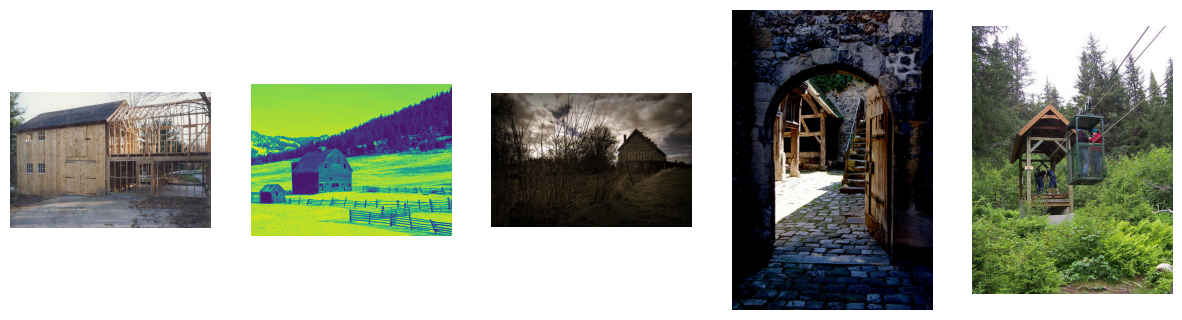

In [ ]:
import matplotlib.pyplot as plt

def display_similar_images(image_paths):
    num_images = len(image_paths)
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display the similar images
display_similar_images(similar_images)

In [ ]:
import os
import shutil

# Define the base directory for cluster folders
cluster_base_dir = './miniImageNet_clusters/'

# Create the base directory if it doesn't exist
if not os.path.exists(cluster_base_dir):
    os.makedirs(cluster_base_dir)

# Create subdirectories for each cluster
for cluster_id in cluster_dict.keys():
    label = cluster_labels[cluster_id]
    label = ''.join(e for e in label if e.isalnum() or e in (' ', '_')).strip()
    cluster_dir = os.path.join(cluster_base_dir, f'{cluster_id}_{label}')
    if not os.path.exists(cluster_dir):
        os.makedirs(cluster_dir)

In [ ]:
for cluster_id, img_paths in cluster_dict.items():
    label = cluster_labels[cluster_id]
    label = ''.join(e for e in label if e.isalnum() or e in (' ', '_')).strip()
    cluster_dir = os.path.join(cluster_base_dir, f'{cluster_id}_{label}')
    for img_path in img_paths:
        shutil.copy(img_path, cluster_dir)